In [2]:
# import necessary libraries
import pandas as pd

# Data Preparation

In [3]:
# load dataset
df= pd.read_csv('/Users/bruce/Documents/Study/phishing ML/From_Saugat/urldata.csv')

In [4]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [5]:
#remove unwanted column
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [7]:
# check shape of dataset
df.shape

(450176, 3)

In [8]:
#check for Null values
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
#check datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [10]:
# check unique values of each column
print(df['label'].unique())
print(df['result'].unique())

['benign' 'malicious']
[0 1]


In [11]:
print(df['label'].value_counts())
print(df['result'].value_counts())

benign       345738
malicious    104438
Name: label, dtype: int64
0    345738
1    104438
Name: result, dtype: int64


In [12]:
# drop column label, as it's need is satisfied by result column i.e benign=0 and malicious=1
df=df.drop('label', axis=1)

In [13]:
df.head()

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


## Feature Creation based on some characteristics

### Length of XYZ

In [14]:
# import libraries
from urllib.parse import urlparse

In [15]:
df_link = df

In [16]:
#1. get length of URL
df_link['url_length'] = df_link['url'].apply(lambda x: len(x))

In [17]:
#2. get length of Hostname
df_link['hostname_length'] = df_link['url'].apply(lambda x: len(str(urlparse(x).hostname)))

In [18]:
#3. get the length of the path from URL
df_link['path_length'] = df_link['url'].apply(lambda x: len(urlparse(x).path))

In [19]:
#4. get the length of first directory
def fd(URL):
    a=urlparse(URL).path
    if str(a[0:2]) == '//':
        return len(a.split('/')[2])
    else:
        try:
            return len(a.split('/')[1])
        except:
            return 0

df_link['FirstDir_length'] = df_link['url'].apply(lambda v: fd(v))

In [20]:
df_link.head()

,url,result,url_length,hostname_length,path_length,FirstDir_length
0,https://www.google.com,0,22,14,0,0
1,https://www.youtube.com,0,23,15,0,0
2,https://www.facebook.com,0,24,16,0,0
3,https://www.baidu.com,0,21,13,0,0
4,https://www.wikipedia.org,0,25,17,0,0


### Counts of XYZ 

In [21]:
#1. total -
df_link['total-'] = df_link['url'].apply(lambda i: i.count('-'))

In [22]:
#2. total @
df_link['total@'] = df_link['url'].apply(lambda i: i.count('@'))

In [23]:
#3. total ?
df_link['total?'] = df_link['url'].apply(lambda i: i.count('?'))

In [24]:
#4. total %
df_link['total%'] = df_link['url'].apply(lambda i: i.count('%'))

In [25]:
#5. total .
df_link['total.'] = df_link['url'].apply(lambda i: i.count('.'))

In [26]:
#6. total =
df_link['total='] = df_link['url'].apply(lambda i: i.count('='))

In [27]:
#7. total http
df_link['totalhttp'] = df_link['url'].apply(lambda i: i.count('http'))

In [28]:
#8. total https
df_link['totalhttps'] = df_link['url'].apply(lambda i: i.count('https'))

In [29]:
#9. total www
df_link['totalwww'] = df_link['url'].apply(lambda i: i.count('www'))

In [30]:
#10 count total digits in the URL
def totaldigits(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df_link['totaldigits']= df_link['url'].apply(lambda i: totaldigits(i))

In [31]:
#11 count total letters in the URL
def totalletters(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df_link['totalletters']= df_link['url'].apply(lambda i: totalletters(i))

In [32]:
#12 count total directories in the URL
def totaldirs(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df_link['totaldirs'] = df_link['url'].apply(lambda i: totaldirs(i))

In [33]:
#13 count of dots in netloc
df_link['totalnetlocdots'] = df_link['url'].apply(lambda i: urlparse(i).netloc.count('.'))

In [59]:
# Internet Assigned Numbers Authority (IANA) approved list of TLD's
TLD_List = []
f=open("tld.txt","r")
for i in f:
    TLD_List.append(i.removesuffix('\n').lower())
print(TLD_List)

['aaa', 'aarp', 'abarth', 'abb', 'abbott', 'abbvie', 'abc', 'able', 'abogado', 'abudhabi', 'ac', 'academy', 'accenture', 'accountant', 'accountants', 'aco', 'actor', 'ad', 'adac', 'ads', 'adult', 'ae', 'aeg', 'aero', 'aetna', 'af', 'afl', 'africa', 'ag', 'agakhan', 'agency', 'ai', 'aig', 'airbus', 'airforce', 'airtel', 'akdn', 'al', 'alfaromeo', 'alibaba', 'alipay', 'allfinanz', 'allstate', 'ally', 'alsace', 'alstom', 'am', 'amazon', 'americanexpress', 'americanfamily', 'amex', 'amfam', 'amica', 'amsterdam', 'analytics', 'android', 'anquan', 'anz', 'ao', 'aol', 'apartments', 'app', 'apple', 'aq', 'aquarelle', 'ar', 'arab', 'aramco', 'archi', 'army', 'arpa', 'art', 'arte', 'as', 'asda', 'asia', 'associates', 'at', 'athleta', 'attorney', 'au', 'auction', 'audi', 'audible', 'audio', 'auspost', 'author', 'auto', 'autos', 'avianca', 'aw', 'aws', 'ax', 'axa', 'az', 'azure', 'ba', 'baby', 'baidu', 'banamex', 'bananarepublic', 'band', 'bank', 'bar', 'barcelona', 'barclaycard', 'barclays', 'bar

In [60]:
#14 Count of TLD's in the netloc


def count_TLD(c):
    count=0

    for i in c:
        if i in TLD_List:
            count+=1
    return count

df_link['totalTLD'] = df_link['url'].apply(lambda i: count_TLD(urlparse(i).netloc.split('.')))



### Classification Features

In [35]:
#1 Use of IP or not in domain

import re
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
df_link['use_of_ip'] = df_link['url'].apply(lambda i: having_ip_address(i))

In [36]:
#2 use of url shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
df_link['short_url'] = df_link['url'].apply(lambda i: shortening_service(i))

In [61]:
df_link.head()

,url,result,url_length,hostname_length,path_length,FirstDir_length,total-,total@,total?,total%,...,totalhttp,totalhttps,totalwww,totaldigits,totalletters,totaldirs,totalnetlocdots,use_of_ip,short_url,totalTLD
0,https://www.google.com,0,22,14,0,0,0,0,0,0,...,1,1,1,0,17,0,2,1,1,2
1,https://www.youtube.com,0,23,15,0,0,0,0,0,0,...,1,1,1,0,18,0,2,1,1,2
2,https://www.facebook.com,0,24,16,0,0,0,0,0,0,...,1,1,1,0,19,0,2,1,1,1
3,https://www.baidu.com,0,21,13,0,0,0,0,0,0,...,1,1,1,0,16,0,2,1,1,2
4,https://www.wikipedia.org,0,25,17,0,0,0,0,0,0,...,1,1,1,0,20,0,2,1,1,1


In [58]:
df_link.shape

(450176, 22)

In [62]:
df_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              450176 non-null  object
 1   result           450176 non-null  int64 
 2   url_length       450176 non-null  int64 
 3   hostname_length  450176 non-null  int64 
 4   path_length      450176 non-null  int64 
 5   FirstDir_length  450176 non-null  int64 
 6   total-           450176 non-null  int64 
 7   total@           450176 non-null  int64 
 8   total?           450176 non-null  int64 
 9   total%           450176 non-null  int64 
 10  total.           450176 non-null  int64 
 11  total=           450176 non-null  int64 
 12  totalhttp        450176 non-null  int64 
 13  totalhttps       450176 non-null  int64 
 14  totalwww         450176 non-null  int64 
 15  totaldigits      450176 non-null  int64 
 16  totalletters     450176 non-null  int64 
 17  totaldirs 

In [92]:
df_link.to_csv("URL_phase1.csv")

# Data Visualization

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

url                345738
result             345738
url_length         345738
hostname_length    345738
path_length        345738
FirstDir_length    345738
total-             345738
total@             345738
total?             345738
total%             345738
total.             345738
total=             345738
totalhttp          345738
totalhttps         345738
totalwww           345738
totaldigits        345738
totalletters       345738
totaldirs          345738
totalnetlocdots    345738
use_of_ip          345738
short_url          345738
totalTLD           345738
dtype: int64


TypeError: text() missing 2 required positional arguments: 'y' and 's'

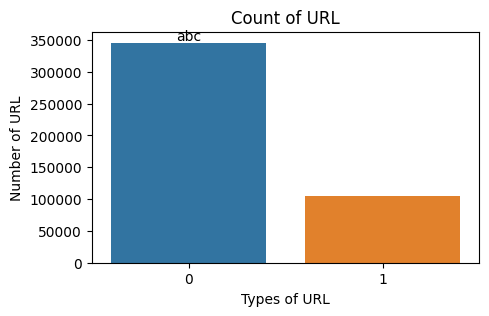

In [111]:
#1 Create a distribution plot for result
k=df[df_link['result'] == 0].count()
print(k)

plt.figure(figsize=(5,3))
sns.countplot(data=df_link, x=df_link['result'])

plt.xlabel('Types of URL')
plt.ylabel('Number of URL')
plt.title('Count of URL')
plt.text(0,350000,'abc', ha='center')
plt.text(1, )
plt.show()

# EDA (Exploratory Data Analysis)

/var/folders/ly/t_qvk5216wd221mgvk65t0b00000gq/T/ipykernel_2645/1110794233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_link.corr()


<AxesSubplot: >

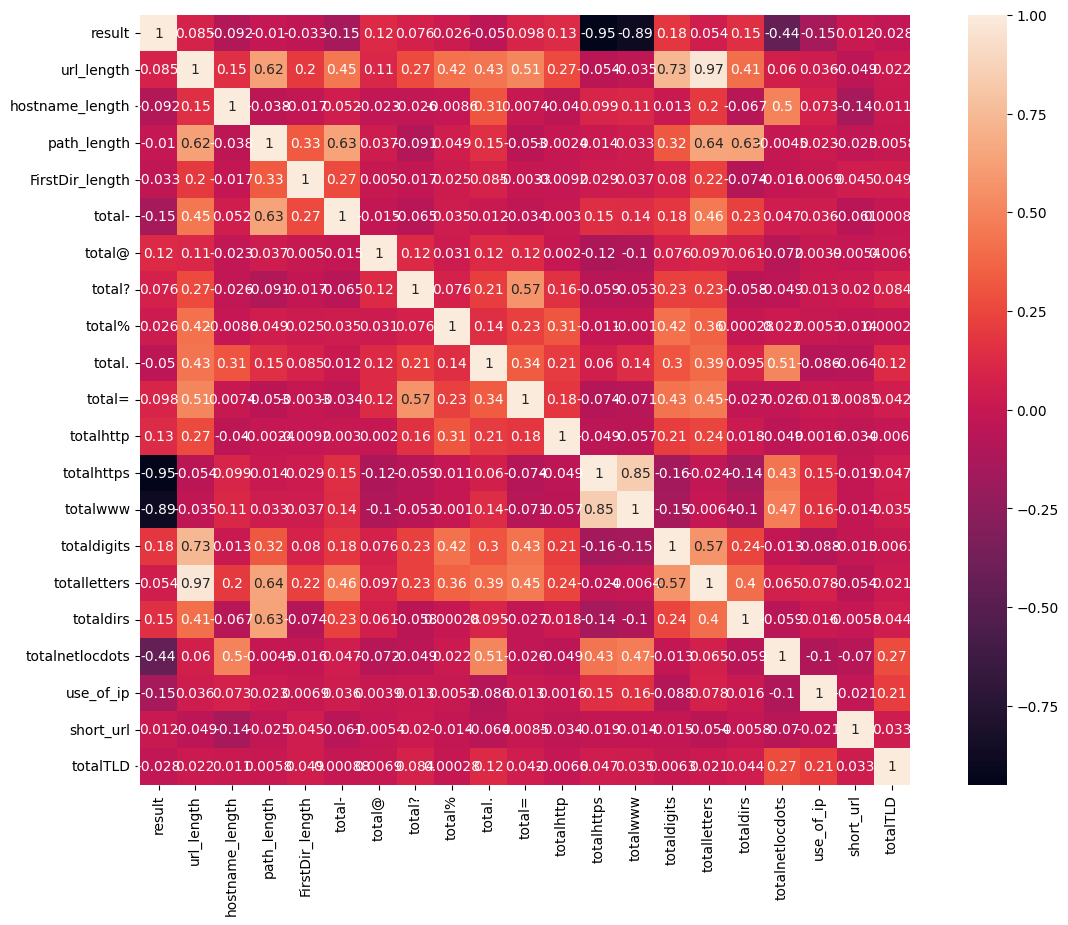

In [112]:
#1 Correlation Heatmap
corrmat = df_link.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [ ]:
#2 